In [ ]:
# Installing necessary libraries
!pip install tensorflow keras opencv-python


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile
import os

# Path to the ZIP file in your Drive
zip_path = '/content/drive/MyDrive/Colab Notebooks/Plant.zip'

# Path to extract files
extract_path = '/content/plant_dataset'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check if the data is extracted properly
print("Extracted folders:", os.listdir(extract_path))


Extracted folders: ['index.txt', 'data']


In [6]:
# List the contents of the extracted folder
for folder in os.listdir(extract_path):
    folder_path = os.path.join(extract_path, folder)
    if os.path.isdir(folder_path):
        print(f"Folder: {folder}")
        print("Files:", os.listdir(folder_path))


Folder: data
Files: ['Potato___healthy', 'Potato___mosaic_virus', 'Tomato___late_blight', 'Raspberry___healthy', 'Grape___black_rot', 'Blueberry___healthy', 'Potato___pests', 'Tomato___spider_mites', 'Potato___nematode', 'Potato___early_blight', 'Bell_pepper___healthy', 'Coffee___healthy', 'Watermelon___anthracnose', 'Strawberry___healthy', 'Sugercane___red_rot', 'Potato___phytophthora', 'Cassava___brown_streak_disease', 'Rice___tungro', 'Sugercane___rust', 'Squash___powdery_mildew', 'Potato___late_blight', 'Grape___black_measles', 'Tomato___target_spot', 'Bell_pepper___bacterial_spot', 'Grape___leaf_blight', 'Tomato___early_blight', 'Apple___alternaria_leaf_spot', 'Rose___slug_sawfly', 'Cassava___green_mottle', 'Sugercane___healthy', 'Grape___Leaf_blight', 'Coffee___red_spider_mite', 'Strawberry___leaf_scorch', 'Rose___rust', 'Peach___bacterial_spot', 'Potato___bacterial_wilt', 'Sugercane___mosaic', 'Potato___leafroll_virus', 'Apple___gray_spot', 'Cherry___healthy', 'Rice___blast', 'C

In [7]:
# Check contents of a specific folder (e.g., 'Apple___scab')
sample_folder_path = os.path.join(extract_path, 'data', 'Apple___scab')
print("Sample files:", os.listdir(sample_folder_path))


Sample files: ['42627.jpg', '101804.jpg', '42280.jpg', '102342.jpg', '42438.jpg', '101825.jpg', '42296.jpg', '102211.jpg', '102020.jpg', '42354.jpg', '42347.jpg', '42846.jpg', '42777.jpg', '102171.jpg', '102332.jpg', '102006.jpg', '102315.jpg', '101918.jpg', '42553.jpg', '102148.jpg', '42692.jpg', '102156.jpg', '42419.jpg', '101902.jpg', '42293.jpg', '101927.jpg', '42732.jpg', '42809.jpg', '42668.jpg', '42507.jpg', '42789.jpg', '42680.jpg', '42724.jpg', '42631.jpg', '42349.jpg', '102326.jpg', '42826.jpg', '102295.jpg', '42415.jpg', '42536.jpg', '102180.jpg', '42519.jpg', '101934.jpg', '102081.jpg', '101974.jpg', '102113.jpg', '102021.jpg', '101781.jpg', '102219.jpg', '102323.jpg', '101916.jpg', '102290.jpg', '102256.jpg', '42784.jpg', '42336.jpg', '102149.jpg', '42792.jpg', '42843.jpg', '102270.jpg', '42465.jpg', '101857.jpg', '102063.jpg', '42276.jpg', '42408.jpg', '42703.jpg', '102010.jpg', '102335.jpg', '42300.jpg', '42847.jpg', '42819.jpg', '42649.jpg', '101965.jpg', '102273.jpg', 

In [8]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set the dataset path
extract_path = '/content/plant_dataset'
image_size = (128, 128)
batch_size = 32

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(extract_path, 'data'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory=os.path.join(extract_path, 'data'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the MobileNetV2 model (pretrained on ImageNet)
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine into a model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
model.fit(
    train_generator,
    epochs=5,  # You can increase this after testing
    validation_data=validation_generator,
    callbacks=[early_stop]
)


Found 92942 images belonging to 72 classes.
Found 23205 images belonging to 72 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 1411s 483ms/step - accuracy: 0.6868 - loss: 1.1519 - val_accuracy: 0.8372 - val_loss: 0.4851
Epoch 2/5
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 1409s 485ms/step - accuracy: 0.8422 - loss: 0.4592 - val_accuracy: 0.8468 - val_loss: 0.4763
Epoch 3/5
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 1446s 498ms/step - accuracy: 0.8589 - loss: 0.4038 - val_accuracy: 0.8539 - val_loss: 0.4588
Epoch 4/5
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 1453s 500ms/step - accuracy: 0.8721 - loss: 0.3622 - val_accuracy: 0.8621 - val_loss: 0.4569
Epoch 5/5
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 1430s 492ms/step - accuracy: 0.8784 - loss: 0.3439 - val_accuracy: 0.8614 - val_loss: 0.4767


In [9]:
# Save entire model in HDF5 format
model.save('plant_disease_model.h5')
print("Model saved as plant_disease_model.h5")


Model saved as plant_disease_model.h5


In [10]:
from google.colab import files
files.download('/content/plant_disease_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator,
    steps_per_epoch=100,
    validation_steps=20,
    callbacks=[early_stop]
)


Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 461ms/step - accuracy: 0.8772 - loss: 0.3237 - val_accuracy: 0.8516 - val_loss: 0.4863
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 823ms/step - accuracy: 0.8812 - loss: 0.3261 - val_accuracy: 0.8344 - val_loss: 0.5497
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 825ms/step - accuracy: 0.8867 - loss: 0.3366 - val_accuracy: 0.8500 - val_loss: 0.5227


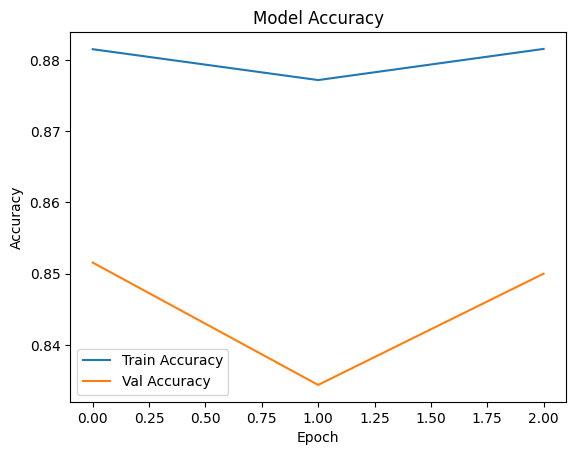

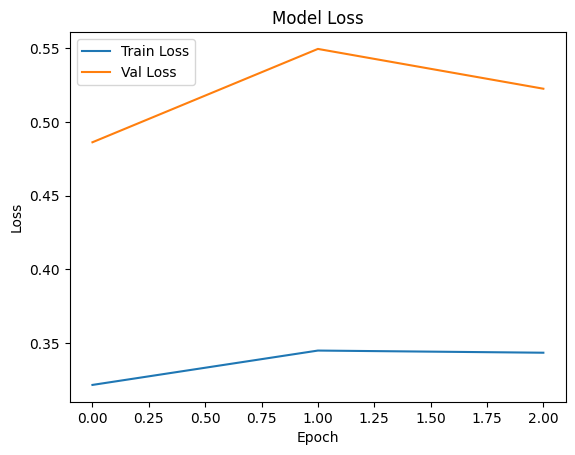

In [13]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
import os

folder_path = '/content/plant_dataset/data/Tomato___healthy'
print("Files:", os.listdir(folder_path)[:5])  # print first 5 file names


Files: ['96258.jpg', '95345.jpg', '95706.jpg', '95150.jpg', '95534.jpg']


In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Use a valid image from the folder
img_path = '/content/plant_dataset/data/Tomato___healthy/96258.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using the trained model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Get class name
class_names = list(train_generator.class_indices.keys())
print("Predicted class:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Tomato___healthy


In [16]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [17]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import streamlit as st
import numpy as np

# Load the trained model
model = load_model('plant_disease_model.h5')

# Define a function for prediction
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Set up Streamlit interface
st.title('Plant Disease Prediction App')
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Save the uploaded image
    with open("uploaded_image.jpg", "wb") as f:
        f.write(uploaded_file.getbuffer())

    # Predict on the uploaded image
    result = predict_image("uploaded_image.jpg")
    st.image("uploaded_image.jpg", caption='Uploaded Image', use_column_width=True)
    st.write(f"Predicted Class: {result}")


2025-05-13 16:04:44.968 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 16:04:45.177 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-13 16:04:45.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 16:04:45.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 16:04:45.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 16:04:45.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 16:04:45.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 16:04:45.186 Thread 'MainThread': mi

In [18]:
!pip install pyngrok


In [29]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load model
model = load_model('plant_disease_model.h5')

st.title('Plant Disease Detection')
st.write('Upload an image of the plant leaf to check for disease.')

uploaded_file = st.file_uploader("Choose a plant leaf image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    img = image.load_img(uploaded_file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)

    if prediction[0] > 0.5:  # Example threshold; adjust as needed
        st.write("The plant is infected!")
    else:
        st.write("The plant is healthy!")


Overwriting app.py


In [20]:
!pip install streamlit pyngrok --quiet


In [30]:
%%writefile app.py
import streamlit as st

st.title("🌿 Plant Disease Detection")
st.write("Upload a leaf image to check for disease (Demo)")


Overwriting app.py


In [31]:
%%writefile app.py
import streamlit as st
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained model
model = load_model("plant_disease_model.h5")

# Class labels (update based on your training data)
class_labels = [
    "Apple Scab", "Apple Black Rot", "Apple Cedar Rust", "Apple Healthy",
    "Corn Gray Leaf Spot", "Corn Common Rust", "Corn Northern Leaf Blight", "Corn Healthy",
    "Grape Black Rot", "Grape Esca", "Grape Leaf Blight", "Grape Healthy"
]

st.title("🌿 Plant Disease Detection")
st.write("Upload a leaf image to identify the disease.")

uploaded_file = st.file_uploader("Choose a leaf image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).resize((224, 224))
    st.image(image, caption="Uploaded Leaf Image", use_column_width=True)

    # Preprocess the image
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    st.success(f"🔍 Predicted Disease: **{predicted_class}**")


Overwriting app.py


In [34]:
!ls

app.py	drive  plant_dataset  plant_disease_model.h5  sample_data


In [36]:
!ngrok config add-authtoken 2x1qcQnqCnJheTfWi6ctlAoW0d2_sjjqG2WbEYiFxZ3NWBQd


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [37]:
# (Optional) Kill old tunnels
from pyngrok import ngrok
ngrok.kill()

# Run Streamlit app in background
!streamlit run app.py --server.port 8501 &

# Start ngrok tunnel
public_url = ngrok.connect(addr=8501, proto="http")
print("🌐 Public URL:", public_url)




2025-05-13 16:13:49.488 Port 8501 is already in use
🌐 Public URL: NgrokTunnel: "https://87a2-34-138-247-240.ngrok-free.app" -> "http://localhost:8501"
